In [26]:
import numpy as np
import pandas as pd
## plotly libraries
import plotly
print(plotly.__version__)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


2.2.2


In [2]:

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training data sets
    random_state  : int
        Random number generator seed for random weight
        initialization
    
    Attributes
    ------------
    w_ : 1d-array
        Wieghts after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch
    
    """
    def __init__(self, eta = 0.01, n_iter =50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        """ Fit training data.
        Parameters
        -----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples number of samples
            and n_features number of features
        Y: array-like, shape = [n_samples]
            Target values.
        Returns
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale =0.01, size = 1+ X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] = update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        """Calcualte net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """ Return class label  after unit step"""
        return np.where(self.net_input(X) >= 0,1,-1)

In [3]:
# select setosa and versicolor
df = pd.read_csv('iris.data')
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)
# extract sepal length and petal length
X = df.iloc[0:100,[0,2]].values

In [4]:
# Create a trace
trace1 = go.Scatter(
    x = X[:50, 0],
    y = X[:50, 1],
    mode = 'markers',
    marker = dict(color = 'red'),
    name = 'setosa'
)


trace2 = go.Scatter(
    x = X[50:100, 0],
    y = X[50:100, 1],
    mode = 'markers',
    marker = dict(symbol = 'x',color = 'blue'),
    name = 'versicolor'
)

data = [trace1,trace2]

layout = go.Layout(
    width=600,
    height=400,
    xaxis= dict(
        title= 'sepal length [cm]',
        zeroline= True,
        showline=True
    ),
    yaxis= dict(
        title= 'petal length [cm]',
        showline=True
    )
)
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

In [5]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
# Create a trace
trace1 = go.Scatter(
    x = list(range(1, len(ppn.errors_) + 1)),
    y = ppn.errors_,
    mode = 'lines+markers',
    marker = dict(color = 'blue')
)

data = [trace1]

layout = go.Layout(
    width=600,
    height=400,
    xaxis= dict(
        title= 'Epochs',
        zeroline= False,
        showline=True
    ),
    yaxis= dict(
        title= 'Number of Updates',
        showline=True
    )
)
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

In [6]:
# Create a trace
trace1 = go.Scatter(
    x = X[:50, 0],
    y = X[:50, 1],
    mode = 'markers',
    marker = dict(color = 'red'),
    name = 'setosa'
)


trace2 = go.Scatter(
    x = X[50:100, 0],
    y = X[50:100, 1],
    mode = 'markers',
    marker = dict(symbol = 'x',color = 'blue'),
    name = 'versicolor'
)


# plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

tx=np.arange(x1_min, x1_max, 0.02)
ty = np.arange(x2_min, x2_max, 0.02)
trace3= go.Contour(
        z=Z,
        x=tx,
        y=ty,
showscale = False,
reversescale = True
    )
data = [trace1,trace2,trace3]
layout = go.Layout(
    width=600,
    height=400,
    xaxis= dict(
        title= 'sepal length [cm]',
        zeroline= True,
        showline=True
    ),
    yaxis= dict(
        title= 'petal length [cm]',
        showline=True
    )
)
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)



In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

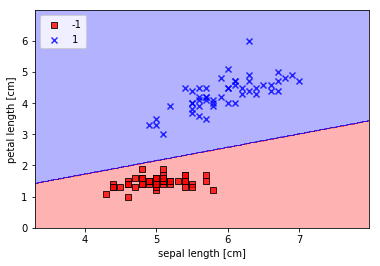

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [40]:
class AdalineGD(object):
    """Adaptive Linear Neuron Classifier
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training data sets
    random_state  : int
        Random number generator seed for random weight
        initialization
    
    Attributes
    ------------
    w_ : 1d-array
        Wieghts after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch
    
    """
    def __init__(self, eta = 0.01, n_iter =50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        """ Fit training data.
        Parameters
        -----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples number of samples
            and n_features number of features
        Y: array-like, shape = [n_samples]
            Target values.
        Returns
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale =0.01, size = 1+ X.shape[1])
        self.cost_ = []
        

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        """Calcualte net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def activation(self,X):
        """Compute linear activation"""
        return X
    def predict(self,X):
        """ Return class label  after unit step"""
        return np.where(self.net_input(X) >= 0,1,-1)

In [47]:
ada1 = AdalineGD(eta = 0.01, n_iter = 10).fit(X,y)
ada2 = AdalineGD(eta = 0.0001, n_iter = 10).fit(X,y)
# Create a trace
trace1 = go.Scatter(
    x = list(range(1, len(ada1.cost_) + 1)),
    y = np.log10(ada1.cost_),
    mode = 'lines+markers',
    marker = dict(color = 'blue')
)
trace2 = go.Scatter(
    x = list(range(1, len(ada2.cost_) + 1)),
    y = ada2.cost_,
    mode = 'lines+markers',
    marker = dict(color = 'blue')
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Adaline Learning rate 0.01 ',
                                                          'Adaline Learning rate 0.0001'),print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title='Epochs',showgrid= False)
fig['layout']['xaxis2'].update(title='Epochs',showgrid= False)


fig['layout']['yaxis1'].update(title='log(Sum-squared-error)',showgrid= False)
fig['layout']['yaxis2'].update(title='Sum-squared-error',showgrid= False)



iplot(fig)